Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies 2 in CpE
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Assignment 5.2: Build and Apply Multilayer Perceptron**
**Name** | Gamundoy, Jon Aviv Cloydd S.
**Section** | CPE32S3
**Date Performed**: | 3/25/2024
**Date Submitted**: | 3/26/2024
**Instructor**: | Engr. Roman M. Richard

<hr>

# Choosing a Dataset and Problem Analysis

The dataset I've chosen is about the survival rate of patients diagnosed with Sepsis. The dataset consists of admissions and hospitalization subjects from 2011 and 2012 in Norway. This activity aims to predict the survival rate of patients early to quickly administer treatment if needed as Sepsis is known for killing patients relatively fast, rendering most laboratory tests too late.

# Data Pre-processing

## Training Dataset

### Load the Dataset

In [ ]:
# Import necessary libraries
import pandas as pd # For dataframes and operations
import numpy as np # For dealing with null values

data = pd.read_csv('Training Dataset.csv') # Read raw csv file

data.info() # Check for data types, missing values, and total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110204 entries, 0 to 110203
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      110204 non-null  int64
 1   sex_0male_1female              110204 non-null  int64
 2   episode_number                 110204 non-null  int64
 3   hospital_outcome_1alive_0dead  110204 non-null  int64
dtypes: int64(4)
memory usage: 3.4 MB


In [ ]:
data.head(20) # Check contents

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,21,1,1,1
1,20,1,1,1
2,21,1,1,1
3,77,0,1,1
4,72,0,1,1
5,83,0,1,1
6,74,0,1,1
7,74,1,1,1
8,69,0,1,1
9,53,1,1,1


In [ ]:
data.describe() # Check for statistics

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,110204.000000,110204.000000,110204.000000,110204.000000
mean,62.735255,0.473948,1.349379,0.926455
std,24.126806,0.499323,0.751799,0.261031
min,0.000000,0.000000,1.000000,0.000000
25%,51.000000,0.000000,1.000000,1.000000
50%,68.000000,0.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


#### **Analysis**



We can see that the dataset is complete, or has no null values, is the same datatype, and contains 3 features and 1 output

We can also observe that the standard deviation of the variables is relatively low indicating that there is little to low dispersion of values, with the exception of *age_years* which says that the age are pretty spread out among the dataset. As for the *episode_number*, we can see that most of its values are '1' since 75% of the entries are 1 or below, so we can expect a slight bias towards that value since we don't have a well-dispersed dataset

There is also more information regarding the maximum value, minimum and average of data in our entries.

### Feature Importance

After verifying that there is no missing values in our dataset, we will now need to determine which features are important that affects our target variable. As well as which variables has correlation to other variables.

Feature: 0, Score: 0.86402
Feature: 1, Score: 0.03819
Feature: 2, Score: 0.09779


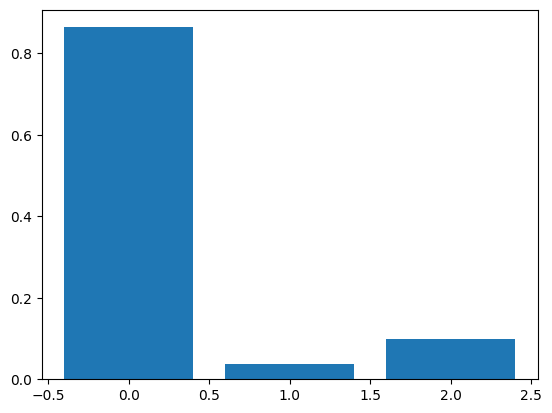

In [ ]:
from sklearn.ensemble import RandomForestRegressor # For feature importance
import matplotlib.pyplot as plt # For plotting

# Determine the predictor nad target variables
target_var = data["hospital_outcome_1alive_0dead"]

attributes = ["age_years", "sex_0male_1female", "episode_number"] # Select the input attributes
input = data[list(attributes)]

# Create object for RF Regressor
model = RandomForestRegressor()

# Fit the model
model.fit(input, target_var)

# Get the featuer importance of teh model
importance = model.feature_importances_

# Print the scores of each feature
# Note:
# Feature 0 = Age
# Feature 1 = Sex
# Feature 2 = Episode Number
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In this graph we can see that the feature that affects the target the most is Feature 0, or *age_years*, it is also to be noted that Feature 1, or *sex_0male_1female* is the least important feature.

### Correlation Analysis

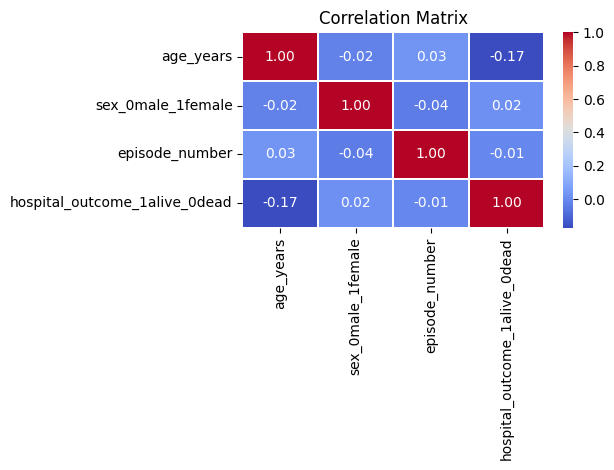

In [ ]:
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For plotting

corr_matrix = data[['age_years', 'sex_0male_1female', 'episode_number', 'hospital_outcome_1alive_0dead']].corr()

# creating a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.05)

# adding labels and title
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

Based on the correlation matrix, it is noticable that the variables have little to no correlation, with *age* having the most correlation in terms of an individual's survival and *episode number* having the least correlation despite being an indicator of prior Sepsis episodes.

### Removing the Outliers

After determining which variables has the most impact, we will now need to detect and remove any outliers that represents an **extreme** in our dataset. To detect outliers, I will be using the Interquartile Range

In [ ]:
data.describe()

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,110204.000000,110204.000000,110204.000000,110204.000000
mean,62.735255,0.473948,1.349379,0.926455
std,24.126806,0.499323,0.751799,0.261031
min,0.000000,0.000000,1.000000,0.000000
25%,51.000000,0.000000,1.000000,1.000000
50%,68.000000,0.000000,1.000000,1.000000
75%,81.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


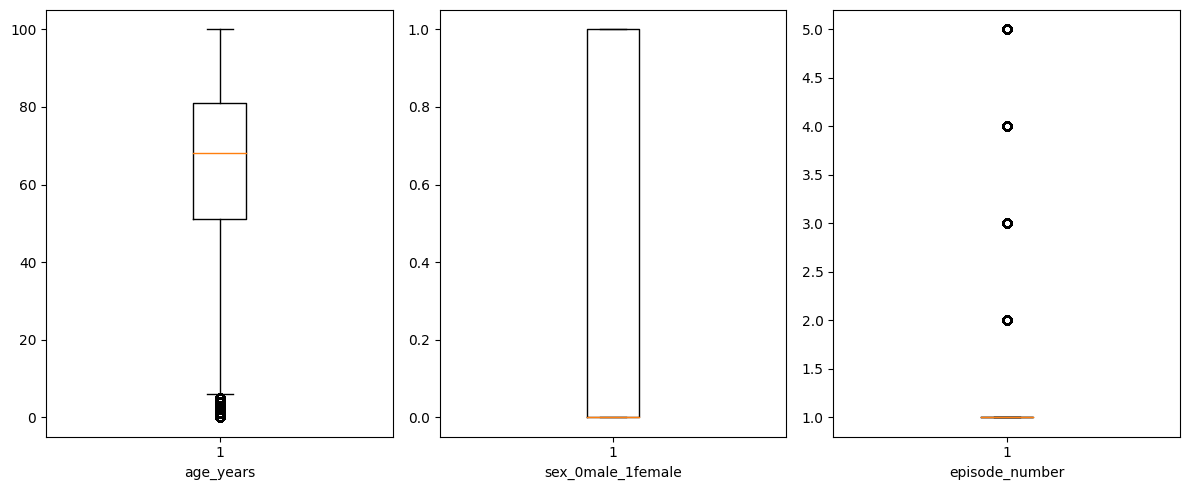

In [ ]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
features = data.columns

# Create boxplots for each feature
for item in range(3):
  axs[item].boxplot(data[features[item]])
  axs[item].set_xlabel(f"{features[item]}")

# Show the boxplots
plt.tight_layout()
plt.show()

As we can see, there are outliers in features *age_years* and *episode_number*. However, according to [Jim Frost](https://statisticsbyjim.com/basics/remove-outliers/), features that are a natural part of the population and cannot be attributed to an error, thus cannot be removed. In our dataset, the feature *episode_number* will not be removed due to its importance in our data. The *age_years* however, have some outliers that can be removed due to its high standard deviation

In [ ]:
# Calculation for 1st and 3rd Quartile
Q1 = data["age_years"].quantile(0.25)
Q3 = data["age_years"].quantile(0.75)

# Calculation for the Interquartile Range (IQR)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

# Identification of the outliers' index in the dataset
outlier_index = ((data < (lower_bound)) | (data > (upper_bound))).all(axis=1)

# Creating a set of data WITHOUT the outlieers
clean_data = data[~outlier_index]

# Creation of new dataframe that is free from outliers
clean_df = clean_data
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104974 entries, 0 to 110201
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   age_years                      104974 non-null  int64
 1   sex_0male_1female              104974 non-null  int64
 2   episode_number                 104974 non-null  int64
 3   hospital_outcome_1alive_0dead  104974 non-null  int64
dtypes: int64(4)
memory usage: 4.0 MB


In [ ]:
clean_df.describe() # Double check

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
count,104974.000000,104974.000000,104974.000000,104974.000000
mean,65.786109,0.474079,1.355831,0.923076
std,20.367968,0.499330,0.756994,0.266472
min,6.000000,0.000000,1.000000,0.000000
25%,55.000000,0.000000,1.000000,1.000000
50%,70.000000,0.000000,1.000000,1.000000
75%,82.000000,1.000000,1.000000,1.000000
max,100.000000,1.000000,5.000000,1.000000


As we can see from the Description of the new dataset, the minimum value of the *age_years* feature is now 6, which was previously 0. This indicates that the outliers that were below the lower_bound threshold was removed.

### Balance the Output Classes

Now that we have established a clean data set, we can now proceed to removing any biases in the model as a result of imbalanced data. Imbalanced Data confuses the model to predict the majority while incorrectly classifying the minority, to remedy this we will need to balance the output classes.

In [ ]:
# Check the data for imbalance in output classes
clean_df["hospital_outcome_1alive_0dead"].value_counts()

1    96899
0     8075
Name: hospital_outcome_1alive_0dead, dtype: int64

Since the classes are quite imbalanced, with the *alive class* having 102k+ entries while the *dead class* only having around 8k+ entries, we will need to balance these classes so that our model can properly predict the outcome with no bias to the majority.

In [ ]:
# Import hte RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Determine the predictor nad target variables
target_var = clean_df["hospital_outcome_1alive_0dead"]

attributes = ["age_years", "sex_0male_1female", "episode_number"] # Select the input attributes
input = clean_df[list(attributes)]

# Initiate the RandomOverSampler object
over = RandomOverSampler()
input_over, target_over = over.fit_resample(input, target_var) # Fit the predictor and target variable

# Check the info on the dataframe
target_over.value_counts()

1    96899
0    96899
Name: hospital_outcome_1alive_0dead, dtype: int64

There are two ways of balancing data: Oversampling and Undersampling.

In our scenario, oversampling was used because it makes the model perform better and does not have any information loss resulting from undersampling. Although it is to be noted that oversampling may lead to overfitting since the minority is replicated to match the number of entries in the majority.

Additionally, this process is not necessary for our test data since the balancing of data is only relevant in training the model as it may have biases when predicting.

### Rescaling

Now that our dataset is clean and balanced, we will now need to standardize or rescale our data so that it can be on the same level. Since we have classification data *gender* we will need to rescale the *age_years* and *episode_number*.

<ipython-input-12-ffa222a89a35>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(input_scaled[:,1])


<Axes: ylabel='Density'>

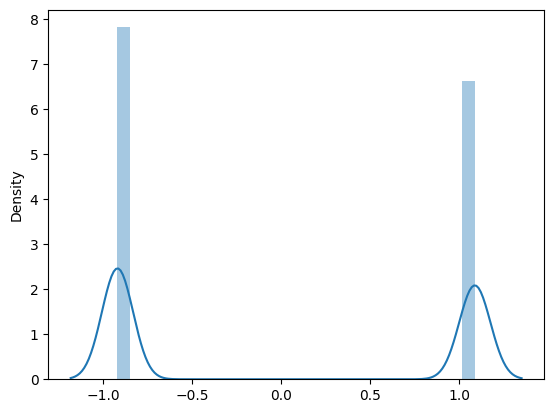

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initiate the object for the standard scaler
scale = StandardScaler()
input_scaled = scale.fit_transform(input_over) # Fit the data to the scaler

# Check
sns.distplot(input_scaled[:,1])

In [ ]:
# Verifying the rescaling of the age_years variable
np.std(input_scaled[:,0]) # Calculates the standard deviation of all the rows in column 0 (age_years)

1.0

With this, we can now verify that the data has been successfully rescaled especially the age_years variable which had a high standard deviation value. Now with this rescaled version, the data are now much closer to each other and will now be compatible with our boolean values of 0 and 1.

## Test Dataset

### Load the Dataset and Verify its contents

In [ ]:
# Import necessary libraries
import pandas as pd # For dataframes and operations
import numpy as np # For dealing with null values

data_test = pd.read_csv('Validation Dataset.csv') # Read raw csv file

data_test.info() # Check for data types, missing values, and total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age_years                      137 non-null    int64
 1   sex_0male_1female              137 non-null    int64
 2   episode_number                 137 non-null    int64
 3   hospital_outcome_1alive_0dead  137 non-null    int64
dtypes: int64(4)
memory usage: 4.4 KB


In [ ]:
data_test.head(20) # Check contents

,age_years,sex_0male_1female,episode_number,hospital_outcome_1alive_0dead
0,20,0,1,1
1,22,0,1,1
2,26,1,2,0
3,33,1,1,1
4,33,0,1,1
5,33,0,2,0
6,35,0,1,1
7,35,1,1,1
8,36,0,1,1
9,36,1,1,1


We can observe that the test dataset has no null values or missing entries.

We no longer need to check for its statistics and correlation since this will serve as our test to see if our model can properly predict the target variable.

As said earlier, the balancing of data is no longer needed since that is only necessary when training the model.

Note: Since our dataset is complete, there is no need to transform any of the entries, but should there be improper data types within our dataset, it should be transformed into a processable data type for our model (e.g. strings to float or integers).

### Rescaling

<ipython-input-16-c9624565957a>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(input_scaled_test[:,1])


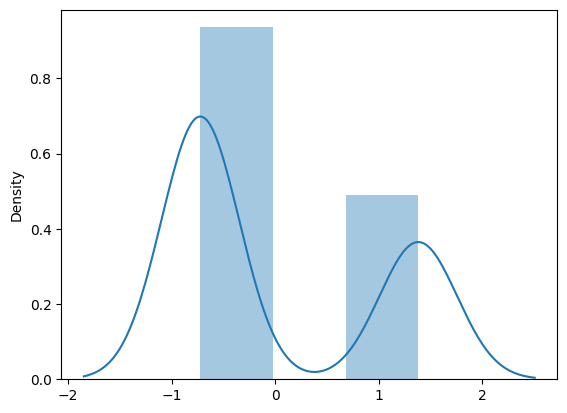

In [ ]:
# Determine the input variables
input_test = data_test[list(attributes)]

input_scaled_test = scale.fit_transform(input_test) # Fit the data to the scaler

# Check
sns.distplot(input_scaled_test[:,1])

# Set the target variable for test dataset
target_test = data_test["hospital_outcome_1alive_0dead"]

In [ ]:
# Verifying the rescaling of the age_years variable
np.std(input_scaled_test[:,0]) # Calculates the standard deviation of all the rows in column 0 (age_years)

1.0

We also need to rescale the test data in order to match the scaling of the training data. This is because our training model has values that are close to 0, if we do not rescale our test data, the model will be confused with the values that are above the scaled value, especially the age variable that contains values such as 48, 20, 35 etc.

## Summary

In the Data Pre-processing, the following was executed:


*   Data Loading and Checking of null values or missing entries
*   Feature Importance to determine which feature has a significant impact to the target variable
*   Correlation Analysis to determine the correlation of each feature to other features
*   Detection and Removal of outliers in the dataset, if any
*   Data balancing to prevent bias in the model prediction
*   Rescaling of both training and test data



# Training Multilayer Perceptron

Now that the pre-processing is finished, we can now proceed in training the model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                    max_iter=1000, random_state=42)

mlp.fit(input_scaled, target_over)

mlp.score(input_scaled, target_over)

0.6406774063715828

After we fitted the training data into the model, we can now test the model on a separate dataset for testing.

**Author's note**: I used MLPClassifier since I found that it is another way of creating a model. I had trouble using TensorFlow in creation and fitting the MLP model, so I resorted to finding other ways of creating a model.

# Applying Multilayer Perceptron

In [ ]:
# Putting the test variables
x_test = input_scaled_test
y_test = target_test

# Predicting using the model
y_pred = mlp.predict(x_test)

mlp.score(x_test, y_test)

0.48175182481751827

We can see that the testing score is lower than the training score, this is normal when training a model.

Now let's store the predictions and put them into a new dataframe alnong the actual values in the test dataset

In [ ]:
# Create a new dataframe containing the prediction and actual value (for checking purposes)
predictions = pd.DataFrame({"Prediction": y_pred, "Actual Value": target_test})

# Display the new dataframe
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Prediction    137 non-null    int64
 1   Actual Value  137 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


Here we can see that the model has a prediction for every entry in the actual value, meaning that no instance have been skipped or left without prediction

In [ ]:
predictions.head(20)

,Prediction,Actual Value
0,1,1
1,1,1
2,1,0
3,1,1
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,1


Here we can see the model's prediction alongside the actual value and check whether or not the model has correctly predicted the target variable.

# Evaluating the Model

To evaluate our model, we will need to compare it's accuracy from training and testing data, as well as show the results of the test.

In [ ]:
# Evaluate the test model
# Display the accuracy of the model of both training and test data sets
print("Training score:" + str(mlp.score(input_scaled, target_over)))
print("Testing score:" + str(mlp.score(x_test, y_test)))

Training score:0.6406774063715828
Testing score:0.48175182481751827


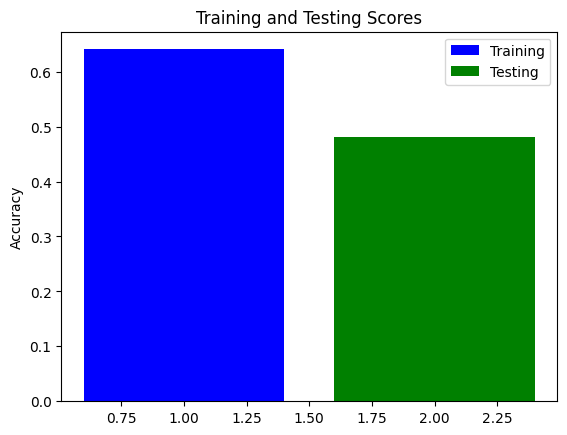

In [ ]:
plt.bar(1, mlp.score(input_scaled, target_over), label="Training", color='b') # Create a bar for Training score
plt.bar(2, mlp.score(x_test, y_test), label="Testing", color='g') # Create a bar for Testing score

plt.plot() # Plot both bar graphs

# Put label on the bar graph
plt.ylabel("Accuracy")
plt.title("Training and Testing Scores")
plt.legend()
plt.show()

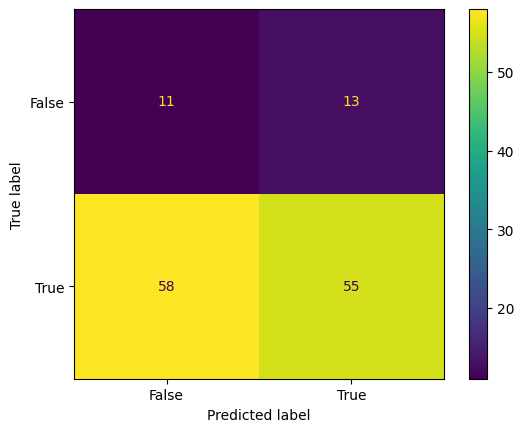

In [ ]:
from sklearn import metrics

# Visualize the data
confusion_matrix = metrics.confusion_matrix(predictions["Actual Value"], predictions["Prediction"])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

As shown in our results, the model struggled in predicting positives in our datasets, predicting 58 false positives and 55 true positives, reaching a score of roughly 50% when predicting true values. This is also true when predicting false values, with the model predicting 11 true negatives and 13 false negatives, also a score of roughly 50%.

This inaccuracy in the model may be contributed to the lack or error in preprocessing of the data or simply the lack of information or pattern in the dataset itself.

# Summary

In this activity, we have pre-processed data, created, applied, and evaluated a MLP model. In the created model, the accuracy have suffered due to the lack of information present in the dataset or improper data pre-processing.

To summarize the process of this activity, the following actions have been taken:

*  Loading of Training and Testing Dataset
*  Verification of both Datasets
*  Identifying Feature Importance and Correlation Analysis
*  Data Cleaning and Balancing
*  Data Standardization and Rescaling
*  Creation of MLP Model
*  Training the MLP Model
*  Evaluation of Model Training
*  Testing of MLP Model on Testing Dataset
*  Test and Model Evaluation

# [References](https://docs.google.com/document/d/1RYTxcOJ0ruOjlC2_QfHHrp3fEDBUR7tBOqpnjWzytsU/edit?usp=sharing)